In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sn


In [33]:
df = pd.read_csv('Train1.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
y_trainsample = y_train.head(100)


In [34]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
x_trainsample = x_train.head(100)
x_train.head(10)

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,su_attempted,count
0,1,0,1,20,9,491,0,0,0,0,0,2
1,2,0,2,44,9,146,0,0,0,0,0,13
2,3,0,1,49,5,0,0,0,0,0,0,123
3,4,0,1,24,9,232,8153,0,0,0,0,5
4,5,0,1,24,9,199,420,0,0,0,0,30
5,6,0,1,49,1,0,0,0,0,0,0,121
6,7,0,1,49,5,0,0,0,0,0,0,166
7,8,0,1,49,5,0,0,0,0,0,0,117
8,9,0,1,51,5,0,0,0,0,0,0,270
9,10,0,1,49,5,0,0,0,0,0,0,133


In [35]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y_trainsample)


In [36]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_trainsample, y)

SVC(kernel='linear')

In [50]:
df2 = pd.read_csv('test1.csv')
x1 = df2.drop(columns = ['class'])
y1= df2['class']
y2 = y1.head(100)
x1.head(100)


,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,su_attempted,count
0,1,0,tcp,private,REJ,0,0,0,0,0,0,229
1,2,0,tcp,private,REJ,0,0,0,0,0,0,136
2,3,2,tcp,ftp_data,SF,12983,0,0,0,0,0,1
3,4,0,icmp,eco_i,SF,20,0,0,0,0,0,1
4,5,1,tcp,telnet,RSTO,0,15,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,tcp,smtp,SF,0,83,0,0,0,0,1
96,97,0,tcp,http,SF,282,4532,0,0,0,0,6
97,98,0,udp,domain_u,SF,44,113,0,0,0,0,3
98,99,0,tcp,private,SH,0,0,0,0,0,0,1


In [39]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [40]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y2)


In [41]:
x_test = x1.head(100)


In [47]:
y_pred = svclassifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[30 19]
 [ 2 49]]
              precision    recall  f1-score   support

           0       0.94      0.61      0.74        49
           1       0.72      0.96      0.82        51

    accuracy                           0.79       100
   macro avg       0.83      0.79      0.78       100
weighted avg       0.83      0.79      0.78       100



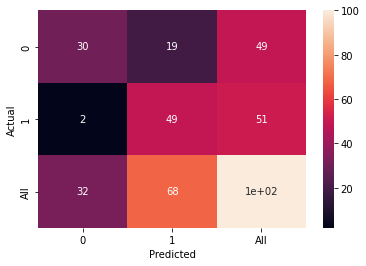

In [45]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()